In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv('songs_normalize.csv')
data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [5]:
data.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


There are 2000 songs in this dataset, each with 18 attributes. No missing values in the dataset.

In [6]:
songs_per_year = data.groupby('year').size()
songs_per_year

year
1998      1
1999     38
2000     74
2001    108
2002     90
2003     97
2004     96
2005    104
2006     95
2007     94
2008     97
2009     84
2010    107
2011     99
2012    115
2013     89
2014    104
2015     99
2016     99
2017    111
2018    107
2019     89
2020      3
dtype: int64

In [21]:
songs_per_artist = pd.DataFrame(data.groupby('artist').size().sort_values(ascending=False))
songs_per_artist.columns = ['number_of_songs']
songs_per_artist.reset_index(inplace=True)
songs_per_artist.head()

,artist,number_of_songs
0,Rihanna,25
1,Drake,23
2,Eminem,21
3,Calvin Harris,20
4,Britney Spears,19


In [24]:
songs_per_artist.describe()

,number_of_songs
count,835.00000
mean,2.39521
std,2.94139
min,1.00000
25%,1.00000
50%,1.00000
75%,2.00000
max,25.00000


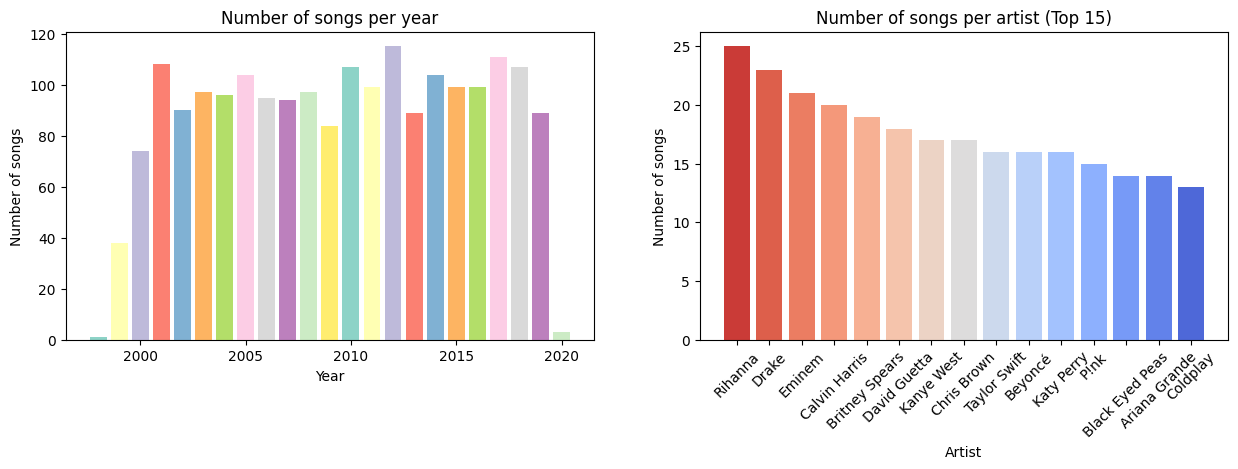

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# Subplot 1: Number of songs per year
colorway = sns.color_palette("Set3", n_colors=23)
axes[0].bar(songs_per_year.index, songs_per_year.values, color=colorway)
axes[0].set_title('Number of songs per year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of songs')

# Subplot 2: Number of songs per artist (Top 10)

colorway = sns.color_palette("coolwarm", n_colors=15)
colorway = list(reversed(colorway))
axes[1].bar(songs_per_artist.artist[:15], songs_per_artist.number_of_songs[:15], color=colorway)
axes[1].set_xlabel('Artist')
axes[1].set_ylabel('Number of songs')
axes[1].set_title('Number of songs per artist (Top 15)')
axes[1].tick_params(axis='x', rotation=45)


In [18]:
data[data['year']==1998]

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,speechiness_category,instrumentalness_category
44,Missy Elliott,Hot Boyz,215466,True,1998,49,0.727,0.445,1,-11.241,1,0.291,0.339,0.0,0.18,0.527,81.125,"hip hop, pop, R&B",Music,Vocal


In [9]:
data[data['year']==2020]

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
308,t.A.T.u.,All The Things She Said,214440,True,2020,39,0.527,0.834,5,-5.767,0,0.0474,0.0411,0.005990,0.105,0.381,179.920,pop
568,Will Smith,Switch,197666,False,2020,34,0.873,0.900,5,-4.325,0,0.1800,0.0107,0.000502,0.556,0.478,102.516,"hip hop, pop"
1991,NSG,Options,240081,True,2020,57,0.836,0.621,1,-4.684,0,0.0894,0.3890,0.000092,0.104,0.762,101.993,"World/Traditional, hip hop"


In [10]:
data['genre'].value_counts()

genre
pop                                      428
hip hop, pop                             277
hip hop, pop, R&B                        244
pop, Dance/Electronic                    221
pop, R&B                                 178
hip hop                                  124
hip hop, pop, Dance/Electronic            78
rock                                      58
rock, pop                                 43
Dance/Electronic                          41
rock, metal                               38
pop, latin                                28
pop, rock                                 26
set()                                     22
hip hop, Dance/Electronic                 16
latin                                     15
pop, rock, metal                          14
hip hop, pop, latin                       14
R&B                                       13
pop, rock, Dance/Electronic               13
country                                   10
metal                                      9
hip 

In [11]:
def custom_autopct(pct):
    return ('%1.1f%%' % pct) if pct > 5 else ''

distri_keys = data['key'].value_counts().sort_index()
key_names = r'C C♯/D♭ D E♭/D♯ E F F♯/G♭ G A♭/G♯ A B♭/A♯ B'.split()
distri_keys.index = key_names
distri_keys = distri_keys / distri_keys.sum()

In [12]:
# Define the speechiness categories
def speechiness_category(speechiness):
        if speechiness < 0.33:
            return 'Music'
        elif speechiness < 0.66 and speechiness >= 0.33:
            return 'Mixed'
        elif speechiness >= 0.66:
             return 'Speech'

data['speechiness_category'] = data['speechiness'].apply(speechiness_category)


In [13]:
# Define the instrumentalness categories
def instrumentalness_category(instrumentalness):
    if instrumentalness > 0.5:
        return "Instrumental"
    else:
        return "Vocal"
    
data['instrumentalness_category'] = data['instrumentalness'].apply(instrumentalness_category)

In [14]:
# Genre
def split_genres(genre):
    g = genre.replace(' ','').split(',')
    g = [t for t in g if t!='set()']
    return g

def flatten(t):
    return [item for sublist in t for item in sublist]

def remove_duplicates(l):
    res = []
    l = [res.append(x) for x in l if x not in res]
    return res

all_genres = remove_duplicates(flatten(list(data['genre'].apply(split_genres))))

genre_count = {genre: 0 for genre in all_genres}

for song in list(data['genre']):
    for genre in split_genres(song):
        genre_count[genre]+=1

In [15]:
genre_count = pd.Series(genre_count).sort_values(ascending=False)
filtered_genre_count = genre_count[genre_count >= 200]
filtered_genre_count['others'] = genre_count[genre_count < 200].sum()
filtered_genre_count = pd.DataFrame(filtered_genre_count, columns=['count'])
filtered_genre_count

,count
pop,1633
hiphop,778
R&B,452
Dance/Electronic,390
rock,234
others,195


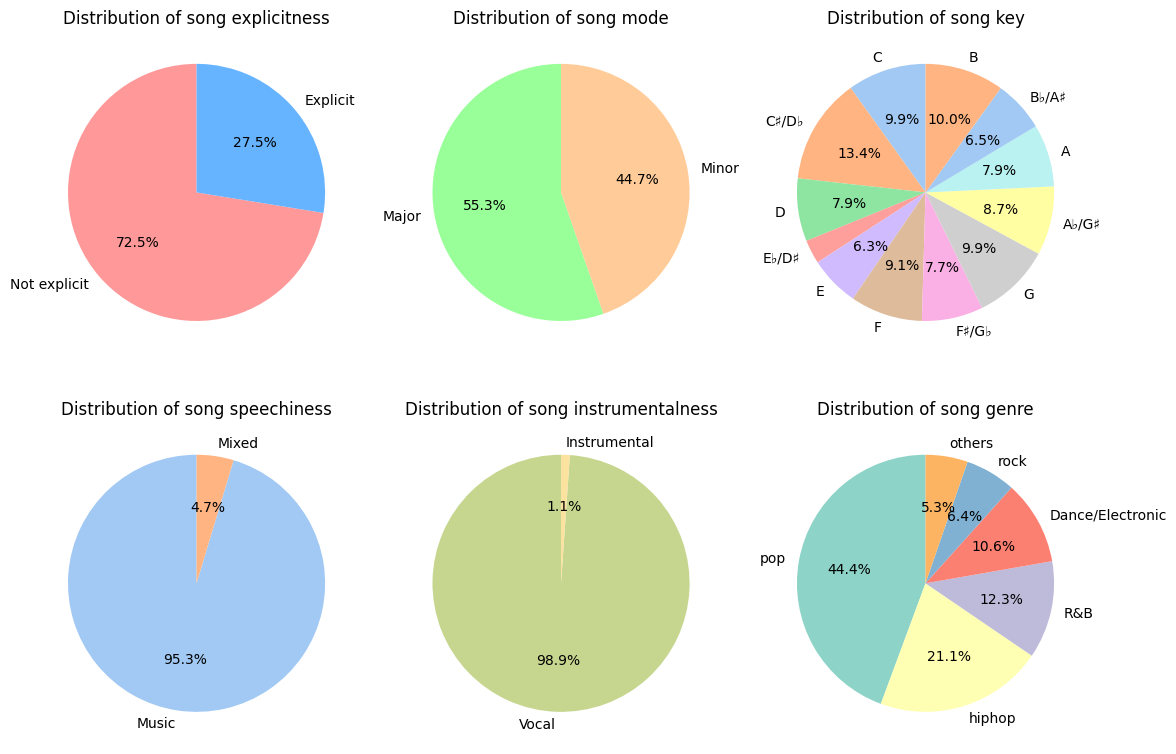

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Subplot 1: Distribution of song explicitness
axes[0, 0].pie(data['explicit'].value_counts(), labels=['Not explicit', 'Explicit'], autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
axes[0, 0].set_title('Distribution of song explicitness')

# Subplot 2: Distribution of song mode
axes[0, 1].pie(data['mode'].value_counts(), labels=['Major', 'Minor'], autopct='%1.1f%%', startangle=90, colors= ['#99ff99', '#ffcc99'])
axes[0, 1].set_title('Distribution of song mode')

# Subplot 3: Distribution of song key
colorway = sns.color_palette("pastel", n_colors=12).as_hex()
axes[0, 2].pie(distri_keys, labels=distri_keys.index, autopct=custom_autopct, startangle=90, colors=colorway)
axes[0, 2].set_title('Distribution of song key')

# Subplot 4: Distribution of song speechiness
axes[1, 0].pie(data['speechiness_category'].value_counts(), labels=['Music', 'Mixed'], autopct='%1.1f%%', startangle=90, colors=['#a1c9f4', '#ffb482'])   
axes[1, 0].set_title('Distribution of song speechiness')

# Subplot 5: Distribution of song instrumentalness
axes[1, 1].pie(data['instrumentalness_category'].value_counts(), labels=['Vocal', 'Instrumental'], autopct='%1.1f%%', startangle=90, colors=['#C6D68F','#FBE29F'])
axes[1, 1].set_title('Distribution of song instrumentalness')

# Subplot 6: Distribution of song genre
axes[1, 2].pie(filtered_genre_count['count'], labels=filtered_genre_count.index, autopct=custom_autopct, startangle=90, colors=sns.color_palette("Set3", n_colors=6))
axes[1, 2].set_title('Distribution of song genre')



plt.tight_layout()
plt.show()






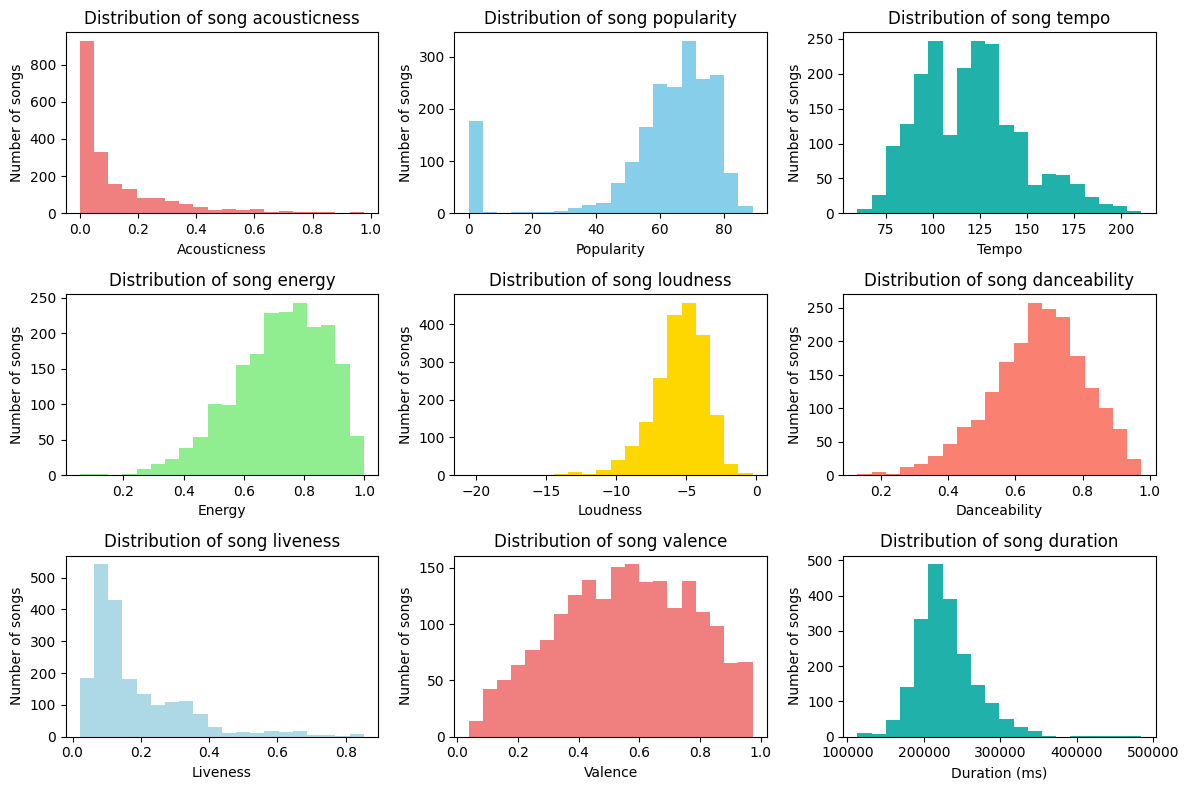

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

# Subplot 1: Distribution of song acousticness
axes[0, 0].hist(data['acousticness'], bins=20, color='lightcoral')
axes[0, 0].set_xlabel('Acousticness')
axes[0, 0].set_ylabel('Number of songs')
axes[0, 0].set_title('Distribution of song acousticness')

# Subplot 2: Distribution of song popularity
axes[0, 1].hist(data['popularity'], bins=20, color='skyblue')
axes[0, 1].set_xlabel('Popularity')
axes[0, 1].set_ylabel('Number of songs')
axes[0, 1].set_title('Distribution of song popularity')

# Subplot 3: Distribution of song tempo
axes[0, 2].hist(data['tempo'], bins=20, color='lightseagreen')
axes[0, 2].set_xlabel('Tempo')
axes[0, 2].set_ylabel('Number of songs')
axes[0, 2].set_title('Distribution of song tempo')

# Subplot 4: Distribution of song energy
axes[1, 0].hist(data['energy'], bins=20, color='lightgreen')
axes[1, 0].set_xlabel('Energy')
axes[1, 0].set_ylabel('Number of songs')
axes[1, 0].set_title('Distribution of song energy')


# Subplot 5: Distribution of song loudness
axes[1, 1].hist(data['loudness'], bins=20, color='gold')
axes[1, 1].set_xlabel('Loudness')
axes[1, 1].set_ylabel('Number of songs')
axes[1, 1].set_title('Distribution of song loudness')

# Subplot 6: Distribution of song danceability
axes[1, 2].hist(data['danceability'], bins=20, color='salmon')
axes[1, 2].set_xlabel('Danceability')
axes[1, 2].set_ylabel('Number of songs')
axes[1, 2].set_title('Distribution of song danceability')

# Subplot 7: Distribution of song liveness
axes[2, 0].hist(data['liveness'], bins=20, color='lightblue')
axes[2, 0].set_xlabel('Liveness')
axes[2, 0].set_ylabel('Number of songs')
axes[2, 0].set_title('Distribution of song liveness')

# Subplot 8: Distribution of song valence
axes[2, 1].hist(data['valence'], bins=20, color='lightcoral')
axes[2, 1].set_xlabel('Valence')
axes[2, 1].set_ylabel('Number of songs')
axes[2, 1].set_title('Distribution of song valence')

# Subplot 9: Distribution of song duration
axes[2, 2].hist(data['duration_ms'], bins=20, color='lightseagreen')
axes[2, 2].set_xlabel('Duration (ms)')
axes[2, 2].set_ylabel('Number of songs')
axes[2, 2].set_title('Distribution of song duration')


plt.tight_layout()
plt.show()